In [61]:
import intake
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import random
intake.__version__
import csv
import s3fs
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import fsspec
from scipy.interpolate import RegularGridInterpolator
import requests

In [21]:
states_goodsensor = []
states_badsensor = []
data_plot_prob = []
data_plot_Rs = []
data_plot_Zs = []
# Open the CSV file
with open('..//data//processed//mast_likelihoods_sample_212.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_prob.append(row)

with open("//Users//cyd//Desktop//MAST_demo_video_Zs.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_Zs.append(row)


with open("//Users//cyd//Desktop//MAST_demo_video_Rs.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_Rs.append(row)


data_plot_prob_good = data_plot_prob[0]
data_plot_prob_bad= data_plot_prob[1]


1107
0.357920565947416


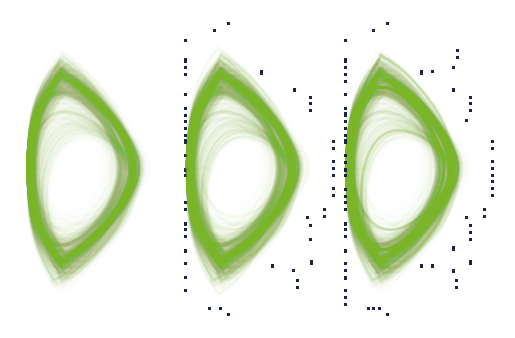

In [ ]:

print(len(data_plot_prob_bad))
print(max(data_plot_prob_good))
data_plot_prob_bad = [float(item) for item in data_plot_prob_bad]
data_plot_prob_good = [float(item) for item in data_plot_prob_good]
focuscolor = "#7AB528"
fig, axs = plt.subplots(1,3)
for g in range(3):
    for i in range(len(data_plot_prob_good)):
    #     plt.plot(data_plot_Rs[i],data_plot_Zs[i])
        testdataR = [float(item) for item in data_plot_Rs[i]]
        testdataZ = [float(item) for item in data_plot_Zs[i]]
        test =data_plot_prob_bad
        axs[g].plot(testdataR,testdataZ,color="#b6b6afff",alpha=4*(1/max(data_plot_prob_good))*1/(len(data_plot_prob_good)))
        if g == 0:
            if i==np.argmax(data_plot_prob_good):
                axs[g].plot(testdataR,testdataZ,
                color="#469DDE",linestyle = "--",alpha=1,linewidth=1,zorder=2000)
        elif g==1:
            axs[g].plot(testdataR,testdataZ,color="#7AB528",alpha=data_plot_prob_bad[i]/max(data_plot_prob_good),linewidth=2,zorder=2100)
            # plt.title("possibilities with measurement")
            for j in range(len(sensor_drop_data["Wave 2"])):
                sensorind = sensor_names.index(sensor_drop_data["Wave 1"][j])
                axs[g].plot(sensor_characteristics[sensorind][0],sensor_characteristics[sensorind][1],"s",markersize=1,color="#192446")
        else:
            # plt.title("possibilities with better sensors")
            axs[g].plot(testdataR,testdataZ,color="#7AB528",alpha=data_plot_prob_good[i]/max(data_plot_prob_good),linewidth=2)
            for j in range(len(sensor_drop_data["Wave 1"])):
                sensorind = sensor_names.index(sensor_drop_data["Wave 1"][j])
                axs[g].plot(sensor_characteristics[sensorind][0],sensor_characteristics[sensorind][1],"s",markersize=1,color="#192446")

        axs[g].set_aspect("equal")
        axs[g].set_xlim([0,2])
        axs[g].set_ylim([-1.8,1.8])
        axs[g].axis('off')

plt.subplots_adjust(wspace=-0.1, hspace=0)
plt.savefig(str(g)+".png",transparent=True,dpi=1000,bbox_inches="tight")
plt.show()